## encontrando pontos-de-interesse em uma imagem e gerando um vetor-de-característica para cada ponto

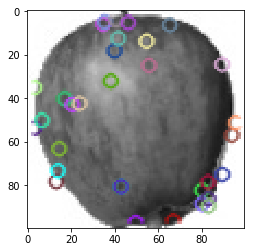

(<matplotlib.image.AxesImage at 0x1e72ce56208>, None)

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('1-0.jpg',0)

# Initiate SIFT detector
#orb = cv2.ORB_create() #ORB é a versão não patenteada
sift = cv2.xfeatures2d.SIFT_create()

# encontrando os pontos-de-interesse
kp = sift.detect(img,None)

# computando o vetor-de-característica para cada ponto dectado no passo anterior
kp, des = sift.compute(img, kp)

#desenhando os pontos na imagem
img2 = cv2.drawKeypoints(img, kp, None)


plt.imshow(img2),plt.show()

In [19]:
qtdePontos = len(kp)
print('Foram detectados: ', qtdePontos, ' pontos')
print('Cada ponto tem: ', len(des[0]), ' características')

Foram detectados:  640  pontos
Cada ponto tem:  128  características


# criando o dicionário de palavras-visuais

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

K = 10
kmeans_model = KMeans(n_clusters=K).fit(des) #des são os vetores-de-características

palavras = np.array(kmeans_model.cluster_centers_)

print(palavras)

[[21.351852  14.         7.7592626 ... 20.166662  15.740743  26.370369 ]
 [25.921345  17.606739   8.089891  ...  4.0674095  3.4831486 16.94382  ]
 [35.634914  12.253963   8.095242  ... 18.857143   7.063493  14.761905 ]
 ...
 [43.351357  19.527025   9.283787  ...  7.2837806  2.743247   5.810811 ]
 [17.531246   9.328126  10.937502  ...  6.5781217  3.7187529 13.5625   ]
 [28.75      13.196426   6.732146  ... 19.803568   3.9285746  4.8571424]]


In [20]:
#mostrando a 1° palavra
print(palavras[0])
print('Tamanho da primeira palavra: ', len(palavras[0]))
print('Qtde de palavras: ', len(palavras))

[ 21.351852   14.          7.7592626  43.462963   71.777794   19.166668
   3.0185208  10.185184   79.648155   30.888887    8.000002   21.370373
  28.185184   15.611114    8.740741   23.09259    29.722237   12.777783
   8.592592   22.333336   48.259247   31.259258   11.518519   13.981482
  27.35185    20.277777   10.000001   13.907408   20.333328   16.759256
   4.388886    9.537034   26.074074   10.055553    6.648152   52.01853
  99.81485    33.574074    5.9814796   7.407402  125.75927    29.888891
   5.2777805  15.92593    26.999998   17.999998   11.888887   42.092587
  46.77778    11.055555    4.222219   21.388891   87.25929    53.203686
  15.055555   16.166672   46.7963     15.685184    6.3333316  10.77778
  28.222221   25.962963   11.000001   20.574074   23.38889     5.796301
   2.3148108  36.35186   103.388855   52.592567    9.537035    8.907411
 126.72221    46.092598    9.962963   13.425924   26.94444    18.574076
   6.3333316  27.037035   51.74077    22.351852   15.148149   39.3

# atribuindo uma palavra-visual para cada ponto detectado

In [23]:
def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma) 

pontos_rotulados = []


for ponto in des:
    min = 9999
    label = -1
    
    for i in range(len(palavras)):
        dist = distancia(ponto, palavras[i])
        if(dist < min):
            min = dist
            label = i
            
    pontos_rotulados.append(label)

print(pontos_rotulados)  
print('qtde de pontos rotulados: ', len(pontos_rotulados))

[4, 9, 9, 3, 7, 1, 1, 7, 7, 1, 1, 1, 9, 5, 9, 1, 1, 1, 1, 5, 5, 5, 4, 1, 8, 1, 5, 7, 2, 0, 9, 3, 0, 8, 5, 5, 2, 3, 8, 4, 6, 3, 2, 2, 4, 5, 5, 0, 8, 5, 4, 2, 8, 9, 3, 5, 0, 6, 5, 5, 6, 2, 5, 0, 9, 4, 9, 9, 9, 8, 9, 5, 6, 9, 9, 9, 3, 5, 8, 0, 9, 5, 3, 5, 2, 4, 4, 2, 8, 4, 5, 5, 2, 8, 5, 1, 8, 5, 8, 5, 9, 4, 2, 9, 2, 4, 5, 5, 9, 4, 5, 5, 0, 1, 6, 0, 2, 9, 8, 3, 2, 5, 7, 6, 2, 5, 3, 3, 5, 9, 2, 8, 2, 5, 0, 8, 9, 2, 6, 9, 0, 1, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 6, 8, 4, 1, 0, 6, 9, 0, 0, 3, 3, 4, 5, 6, 1, 4, 2, 5, 5, 0, 0, 4, 9, 2, 2, 4, 0, 7, 9, 4, 2, 5, 4, 4, 9, 1, 5, 5, 6, 8, 8, 3, 7, 0, 0, 2, 8, 0, 5, 9, 5, 4, 6, 3, 4, 7, 2, 8, 2, 8, 2, 2, 5, 8, 4, 2, 5, 5, 7, 4, 2, 5, 9, 5, 5, 8, 9, 7, 3, 5, 2, 5, 5, 0, 3, 8, 5, 2, 6, 1, 5, 2, 4, 2, 4, 4, 0, 3, 3, 3, 0, 0, 0, 2, 2, 2, 3, 8, 6, 5, 8, 2, 0, 9, 1, 5, 6, 6, 9, 3, 8, 2, 4, 1, 5, 9, 2, 2, 2, 5, 5, 5, 5, 4, 6, 2, 2, 2, 7, 5, 5, 3, 3, 9, 5, 5, 3, 3, 1, 9, 9, 4, 5, 0, 5, 4, 6, 2, 2, 5, 9, 9, 8, 9, 8, 6, 8, 8, 5, 9, 9, 5, 5, 8, 0, 5, 7, 9, 2, 2, 5, 

## computando a frequencia das palavras-visuais na imagem (histograma de palavras)

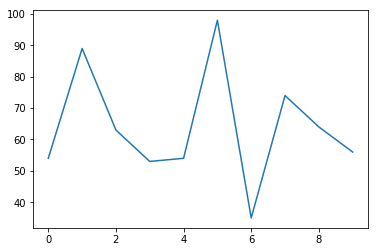

In [24]:
hist = np.zeros(10)

for i in pontos_rotulados:
    hist[i] += 1
    
plt.plot(hist)    

## gerando o vetor de característica para cada imagem da base de dados

In [33]:
def extrair_caracteristica(img):
    sift = cv2.xfeatures2d.SIFT_create()
    # encontrando os pontos-de-interesse
    kp = sift.detect(img,None)
    print('Qtde Pontos Detectados: ', len(kp))
    # computando o vetor-de-característica para cada ponto dectado no passo anterior
    kp, des = sift.compute(img, kp)
    pontos_rotulados = []

    for ponto in des:
        min = 9999
        label = -1
        for i in range(len(palavras)):
            dist = distancia(ponto, palavras[i])
            if(dist < min):
                min = dist
                label = i
        pontos_rotulados.append(label)
    
    hist = np.zeros(10)

    for i in pontos_rotulados:
        hist[i] += 1
    
    return hist
    

In [34]:
import os

files_path = [os.path.abspath(x) for x in os.listdir('./') if x.endswith('.jpg')]

base_teste = []

#extraindo as características das imagens na base de dados
for i in files_path:
    diretorio, arquivo = os.path.split(i)
    imagem = cv2.imread(arquivo)
    carac = extrair_caracteristica(imagem)
    print(arquivo, carac)
    classe = arquivo.split('-')
    base_teste.append((carac, classe[0]))  

Qtde Pontos Detectados:  35
1-0.jpg [ 1. 11.  1.  2.  2.  0.  2. 12.  4.  0.]
Qtde Pontos Detectados:  35
1-1.jpg [ 0. 14.  0.  1.  1.  0.  3. 14.  2.  0.]
Qtde Pontos Detectados:  22
1-2.jpg [ 1.  5.  0.  2.  2.  1.  0. 11.  0.  0.]
Qtde Pontos Detectados:  28
2-0.jpg [ 0. 10.  0.  0.  1.  0.  1. 16.  0.  0.]
Qtde Pontos Detectados:  31
2-1.jpg [ 1. 16.  0.  3.  1.  1.  0.  9.  0.  0.]
Qtde Pontos Detectados:  12
2-2.jpg [0. 6. 0. 1. 0. 0. 0. 5. 0. 0.]
Qtde Pontos Detectados:  22
3-0.jpg [ 0.  9.  0.  2.  1.  0.  0. 10.  0.  0.]
Qtde Pontos Detectados:  33
3-1.jpg [ 0. 14.  0.  0.  4.  0.  0. 15.  0.  0.]
Qtde Pontos Detectados:  29
3-2.jpg [ 0.  9.  1.  0.  3.  0.  1. 14.  1.  0.]
Qtde Pontos Detectados:  77
4-0.jpg [ 1. 18.  6.  5.  8.  5.  8. 23.  1.  2.]
Qtde Pontos Detectados:  54
4-1.jpg [ 1.  9.  3.  5. 11.  1.  6. 15.  1.  2.]
Qtde Pontos Detectados:  55
4-2.jpg [ 0. 17.  3.  1.  8.  7.  4. 15.  0.  0.]
Qtde Pontos Detectados:  16
5-0.jpg [0. 5. 0. 0. 1. 0. 0. 9. 1. 0.]
Qtde P